# Test files for Recurrent Neural Network

In [54]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers

### Loading data

In [ ]:
from load_data import load_and_transform_data, load_and_transform_data_varDim

In [56]:
X_train, y_train, X_val, y_val, X_test, y_test = load_and_transform_data(SEED=42)

Dataset already exists at: chest_xray_data

Dataset ready at: c:\Users\eirik\Desktop\FYSSTK3155_Dataprocessing_and_MachineLearning\Project3_FYSSTK3155-4155\Code\chest_xray_data
Dataset already exists at: chest_xray_data_split



Loading test: 100%|██████████| 587/587 [00:10<00:00, 54.93it/s] 


Train: (4684, 480, 480), Val: (585, 480, 480), Test: (587, 480, 480)


In [57]:
# Check shape of subsets
print(f"X train shape:\t", X_train.shape)
print(f"y train shape:\t", y_train.shape)
print(f"X val shape:\t", X_val.shape)
print(f"y val shape:\t", y_val.shape)
print(f"X test shape:\t", X_test.shape)
print(f"y test shape:\t", y_test.shape)

X train shape:	 (4684, 480, 480)
y train shape:	 (4684,)
X val shape:	 (585, 480, 480)
y val shape:	 (585,)
X test shape:	 (587, 480, 480)
y test shape:	 (587,)


### Setting up the RNNs

In [ ]:
RNN = keras.Sequential()                          # Create a base sequential model
RNN.add(keras.Input(shape=(480, 480)))            # Set the input shape
RNN.add(layers.SimpleRNN(units=240, unroll=True))      # Add a simple RNN layer
RNN.add(layers.Dense(units=2, activation="softmax")) # Output layer

# Get a summary of model configuration
RNN.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 240)            │       173,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           482 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,522 (677.82 KB)

 Trainable params: 173,522 (677.82 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
LSTM = keras.Sequential()                          # Create a base sequential model
LSTM.add(keras.Input(shape=(480, 480)))            # Set the input shape
LSTM.add(layers.LSTM(units=240, unroll=True))      # Add a LSTM layer
LSTM.add(layers.Dense(units=2, activation="softmax")) # Output layer

# Get a summary of model configuration
LSTM.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 240)            │       692,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           482 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 692,642 (2.64 MB)

 Trainable params: 692,642 (2.64 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
GRU = keras.Sequential()                          # Create a base sequential model
GRU.add(keras.Input(shape=(480, 480)))            # Set the input shape
GRU.add(layers.GRU(units=240, unroll=True))      # Add a GRU layer
GRU.add(layers.Dense(units=2, activation="softmax")) # Output layer

# Get a summary of model configuration
GRU.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 240)            │       519,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           482 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 520,322 (1.98 MB)

 Trainable params: 520,322 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [61]:
RNN.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

RNN_trainer = RNN.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=25)

Epoch 1/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step - accuracy: 0.7116 - loss: 0.6197 - val_accuracy: 0.4872 - val_loss: 0.7158
Epoch 2/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - accuracy: 0.7263 - loss: 0.5847 - val_accuracy: 0.3949 - val_loss: 0.8447
Epoch 3/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.7282 - loss: 0.5811 - val_accuracy: 0.3692 - val_loss: 0.8492
Epoch 4/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.7274 - loss: 0.5787 - val_accuracy: 0.4359 - val_loss: 0.7472
Epoch 5/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - accuracy: 0.7269 - loss: 0.5767 - val_accuracy: 0.5624 - val_loss: 0.6849
Epoch 6/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.7310 - loss: 0.5758 - val_accuracy: 0.4085 - val_loss: 0.7498
Epoch 7/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.7295 - loss: 0.5721 - val_accuracy: 0.6957 - val_loss: 0.6310
Epoch 8/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.7254 - loss: 0.5757 - 

In [62]:
LSTM.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

LSTM_trainer = LSTM.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=25)

Epoch 1/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 147s 809ms/step - accuracy: 0.7156 - loss: 0.5975 - val_accuracy: 0.7299 - val_loss: 0.5855
Epoch 2/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 116s 787ms/step - accuracy: 0.7289 - loss: 0.5745 - val_accuracy: 0.7402 - val_loss: 0.5936
Epoch 3/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 113s 771ms/step - accuracy: 0.7295 - loss: 0.5674 - val_accuracy: 0.7350 - val_loss: 0.5805
Epoch 4/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 117s 795ms/step - accuracy: 0.7304 - loss: 0.5649 - val_accuracy: 0.7385 - val_loss: 0.6072
Epoch 5/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 112s 762ms/step - accuracy: 0.7306 - loss: 0.5668 - val_accuracy: 0.7350 - val_loss: 0.5805
Epoch 6/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 116s 787ms/step - accuracy: 0.7304 - loss: 0.5654 - val_accuracy: 0.7350 - val_loss: 0.5806
Epoch 7/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 110s 748ms/step - accuracy: 0.7308 - loss: 0.5627 - val_accuracy: 0.7350 - val_loss: 0.5798
Epoch 8/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 117s 796ms/step - accuracy: 0.7319 -

In [ ]:
GRU.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

GRU_trainer = GRU.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=25)

Epoch 1/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 194s 975ms/step - accuracy: 0.7064 - loss: 0.6288 - val_accuracy: 0.7265 - val_loss: 0.5741
Epoch 2/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 128s 869ms/step - accuracy: 0.7848 - loss: 0.4597 - val_accuracy: 0.7470 - val_loss: 0.4603
Epoch 3/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 134s 911ms/step - accuracy: 0.8433 - loss: 0.3516 - val_accuracy: 0.8034 - val_loss: 0.3697
Epoch 4/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 126s 856ms/step - accuracy: 0.8777 - loss: 0.2907 - val_accuracy: 0.7949 - val_loss: 0.3877
Epoch 5/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 124s 845ms/step - accuracy: 0.8918 - loss: 0.2548 - val_accuracy: 0.8752 - val_loss: 0.2787
Epoch 6/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 120s 815ms/step - accuracy: 0.9063 - loss: 0.2270 - val_accuracy: 0.8803 - val_loss: 0.2508
Epoch 7/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 119s 809ms/step - accuracy: 0.9197 - loss: 0.2032 - val_accuracy: 0.9128 - val_loss: 0.2265
Epoch 8/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 118s 804ms/step - accuracy: 0.9238 -

In [ ]:
RNN_test_loss, RNN_test_acc = GRU.evaluate(X_test, y_test)
print(f'RNN Test Accuracy: {RNN_test_acc}')

LSTM_test_loss, LSTM_test_acc = LSTM.evaluate(X_test, y_test)
print(f'LSTM Test Accuracy: {LSTM_test_acc}')

GRU_test_loss, GRU_test_acc = GRU.evaluate(X_test, y_test)
print(f'GRU Test Accuracy: {GRU_test_acc}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9182 - loss: 0.2332
RNN Test Accuracy: 0.918228268623352
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.8228 - loss: 0.4056
LSTM Test Accuracy: 0.822827935218811
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.9182 - loss: 0.2332
GRU Test Accuracy: 0.918228268623352


### Plotting Results

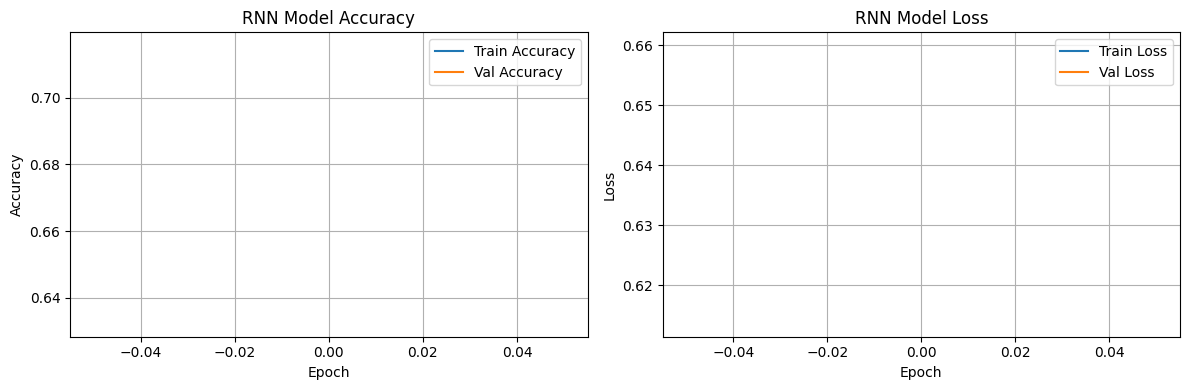

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
ax1.plot(RNN_trainer.history['accuracy'], label='Train Accuracy')
ax1.plot(RNN_trainer.history['val_accuracy'], label='Val Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('RNN Model Accuracy')
ax1.legend()
ax1.grid(True)

# Loss plot
ax2.plot(RNN_trainer.history['loss'], label='Train Loss')
ax2.plot(RNN_trainer.history['val_loss'], label='Val Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('RNN Model Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

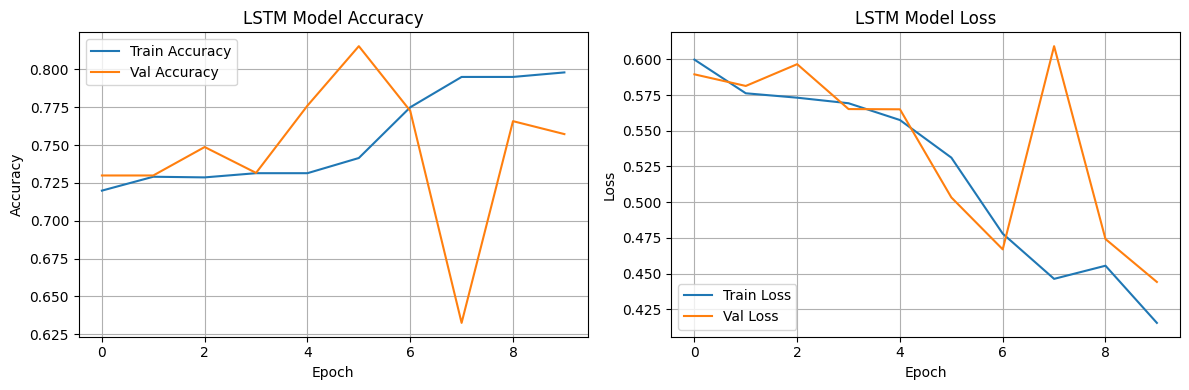

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
ax1.plot(LSTM_trainer.history['accuracy'], label='Train Accuracy')
ax1.plot(LSTM_trainer.history['val_accuracy'], label='Val Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('LSTM Model Accuracy')
ax1.legend()
ax1.grid(True)

# Loss plot
ax2.plot(LSTM_trainer.history['loss'], label='Train Loss')
ax2.plot(LSTM_trainer.history['val_loss'], label='Val Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('LSTM Model Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

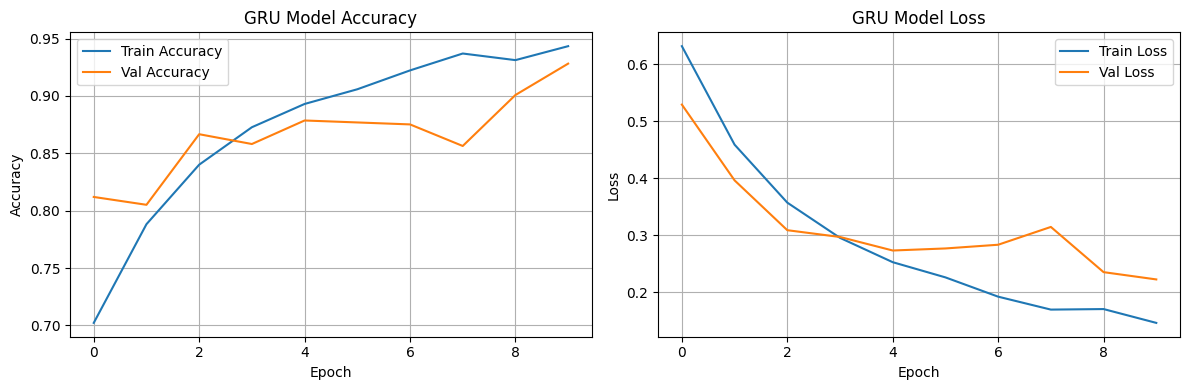

In [ ]:
# 1. Plot training history (accuracy and loss over epochs)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
ax1.plot(GRU_trainer.history['accuracy'], label='Train Accuracy')
ax1.plot(GRU_trainer.history['val_accuracy'], label='Val Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('GRU Model Accuracy')
ax1.legend()
ax1.grid(True)

# Loss plot
ax2.plot(GRU_trainer.history['loss'], label='Train Loss')
ax2.plot(GRU_trainer.history['val_loss'], label='Val Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('GRU Model Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step


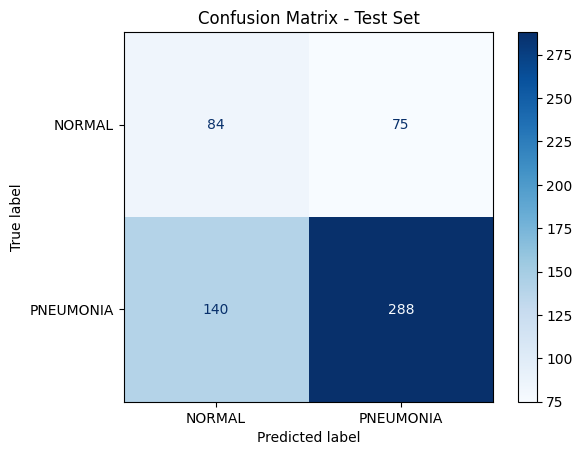

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6337 - loss: 0.6493
Test Accuracy: 0.6337
Test Loss: 0.6493


In [ ]:
y_pred = RNN.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                               display_labels=['NORMAL', 'PNEUMONIA'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.show()

# 3. Print test metrics
test_loss, test_acc = RNN.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step


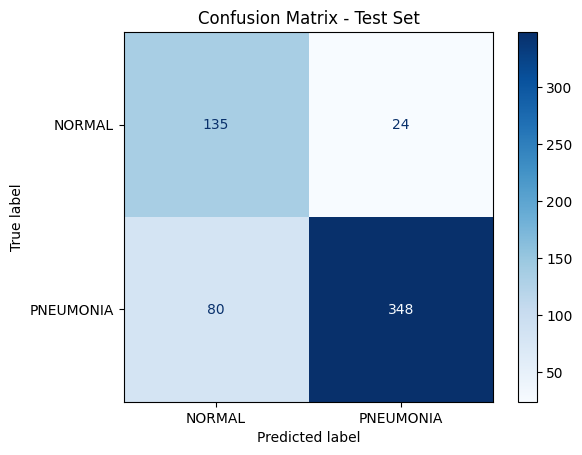

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.8228 - loss: 0.4056
Test Accuracy: 0.8228
Test Loss: 0.4056


In [ ]:
y_pred = LSTM.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                               display_labels=['NORMAL', 'PNEUMONIA'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.show()

# 3. Print test metrics
test_loss, test_acc = LSTM.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step


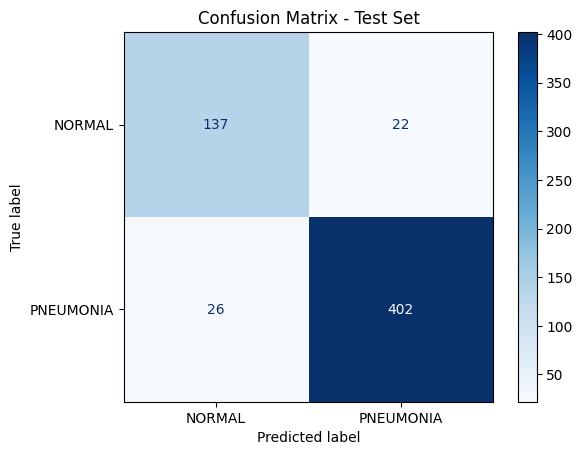

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.9182 - loss: 0.2332
Test Accuracy: 0.9182
Test Loss: 0.2332


In [ ]:
y_pred = GRU.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                               display_labels=['NORMAL', 'PNEUMONIA'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.show()

# 3. Print test metrics
test_loss, test_acc = GRU.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

## Testing with varying image sizes

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = load_and_transform_data_varDim(SEED=42)

In [ ]:
GRU_var = keras.Sequential()                          # Create a base sequential model
GRU_var.add(keras.Input(shape=(2916, 2583)))            # Set the input shape to the maximum size in the dataset
GRU_var.add(layers.Masking(mask_value=0.0))         # Padding for images smaller than the max
GRU_var.add(layers.GRU(units=240, unroll=True))      # Add a GRU layer
GRU_var.add(layers.Dense(units=2, activation="softmax")) # Output layer

# Get a summary of model configuration
GRU_var.summary()

In [ ]:
from keras.optimizers import Adam, SGD, RMSprop

# Hyperparameters

# Model
units = [64, 128, 256, 512]
activation = ['tanh', 'relu']
dropout = [0.0, 0.1, 0.2, 0.3]
unroll = [True, False]

# Training
optimizer = Adam(
    learning_rate=0.001,          # Learning rate
    beta_1=0.9,                   # Adam beta_1
    beta_2=0.999,                 # Adam beta_2
)

batch_size = [16, 32, 64, 128]    # Batch size
epochs = [10, 25, 50, 100]        # Number of training epochs

callbacks=keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  # Stop if no improvement for 5 epochs

In [ ]:
GRU_var.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

GRU_var_trainer = GRU_var.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=25)

In [ ]:
GRU_var_test_loss, GRU_var_test_acc = GRU.evaluate(X_test, y_test)
print(f'GRU Test Accuracy: {GRU_var_test_acc}')

In [ ]:
# 1. Plot training history (accuracy and loss over epochs)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
ax1.plot(GRU_var_trainer.history['accuracy'], label='Train Accuracy')
ax1.plot(GRU_var_trainer.history['val_accuracy'], label='Val Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('GRU Model Accuracy')
ax1.legend()
ax1.grid(True)

# Loss plot
ax2.plot(GRU_var_trainer.history['loss'], label='Train Loss')
ax2.plot(GRU_var_trainer.history['val_loss'], label='Val Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('GRU Model Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
y_pred = GRU_var.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                               display_labels=['NORMAL', 'PNEUMONIA'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.show()

# 3. Print test metrics
test_loss, test_acc = GRU_var.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')